# MM-Fit Exploratory Data Analysis

The MM-Fit dataset is a substantial collection of time-synchronised inertial sensor data from smartphones, smartwatches and earbuds worn by participants while performing full-body workouts, and multi-viewpoint RGB-D video, with 2D and 3D pose estimates. To download the MM-Fit dataset, please visit the [MM-Fit website](https://mmfit.github.io/).

The released MM-Fit dataset consists of a range of modalities; accelerometer, gyroscope, magnetometer, heart-rate, 2D and 3D pose estimates, collected using a number of wearables (smartwatches, smartphones, and earbud), and cameras. MM-Fit is annotated with the start and end times of exercise sets, and with the repetition count for each set. The following 10 activity classes are present in MM-Fit:
```
CLASSES = ['squats', 'lunges', 'bicep_curls', 'situps', 'pushups', 'tricep_extensions', 'dumbbell_rows', 'jumping_jacks', 'dumbbell_shoulder_press', 'lateral_shoulder_raises']
```
___

### Modalities

All modalities are stored as numpy arrays, and can be loaded using ```utils.load_modality(..)```. The modalities have the following dimensions and columns:

| Modality         | Dimensions   | Columns                                  |
|------------------|--------------|------------------------------------------|
| Accelerometer    | (N x 5)      | (Frame, Timestamp, X, Y, Z)              |
| Gyroscope        | (N x 5)      | (Frame, Timestamp, X, Y, Z)              |
| Magnetometer     | (N x 5)      | (Frame, Timestamp, X, Y, Z)              |
| Heart-rate       | (N x 3)      | (Frame, Timestamp, Heart-rate)           |
| 2D Pose Estimate | (2 x N x 19) | (Frame, Joint 1, Joint 2, ..., Joint 18) |
| 3D Pose Estimate | (3 x N x 33) | (Frame, Joint 1, Joint 2, ..., Joint 32) |

N denotes the number of data measurements f|or each modality, which differs depending on the device's sampling frequency for each modality. The devices used in the data collection and their sampling frequencies are given in the table below. Each data point is associated with a frame from the left RGB-D camera, which was chosen as the reference device for synchronizing all data streams. The Timestamp column contains the synchronized timestamp for each data point.

| Device                               | Modality               | Frequency (Hz) |
|--------------------------------------|------------------------|----------------|
| camera: Orbbec Astra Pro             | RGB                    | 30             |
| camera: Orbbec Astra Pro             | Depth                  | 30             |
| earbud: eSense (Nokia Bell-Labs)     | Accelerometer          | 90             |
| earbud: eSense (Nokia Bell-Labs)     | Gyroscope              | 90             |
| 2x smartwatches: Mobvoi TicWatch Pro | Accelerometer          | 100            |
| 2x smartwatches: Mobvoi TicWatch Pro | Gyroscope              | 100            |
| 2x smartwatches: Mobvoi TicWatch Pro | Heart beats per minute | 1              |
| smartphone: Samsung S7               | Accelerometer          | 210            |
| smartphone: Samsung S7               | Gyroscope              | 210            |
| smartphone: Samsung S7               | Magnetometer           | 100            |
| smartphone: Huawei P20               | Accelerometer          | 500            |
| smartphone: Huawei P20               | Gyroscope              | 500            |
| smartphone: Huawei P20               | Magnetometer           | 65             |

The 2D pose is represented using the COCO Keypoint model, and consists of 18 joints. The 3D pose is represented using the Human3.6M Keypoint model, and consists of 17 joints. The respective keypoint models are given below:
```
{
    'pose_2d':
    {
        0: 'Nose', 
        1: 'Neck', 
        2: 'Right Shoulder', 
        3: 'Right Elbow', 
        4: 'Right Wrist',
        5: 'Left Shoulder',
        6: 'Left Elbow',
        7: 'Left Wrist',
        8: 'Right Hip',
        9: 'Right Knee',
        10: 'Right Ankle',
        11: 'Left Hip', 
        12: 'Left Knee',
        13: 'Left Ankle',
        14: 'Right Eye',
        15: 'Left Eye',
        16: 'Right Ear',
        17: 'Left Ear'
    }
    'pose_3d':
    {
        0: 'Hip', 
        1: 'Left Hip', 
        2: 'Left Knee', 
        3: 'Left Foot', 
        4: 'Right Hip', 
        5: 'Right Knee',
        6: 'Right Foot',
        7: 'Spine', 
        8: 'Thorax', 
        9: 'Neck/Nose', 
        10: 'Head', 
        11: 'Right Shoulder', 
        12: 'Right Elbow', 
        13: 'Right Wrist', 
        14: 'Left Shoulder', 
        15: 'Left Elbow', 
        16: 'Left Wrist'
    }
}
```
___

### Data Split

To allow for easy comparison and benchmarking of results, we recommend using the following dataset split:
```
{
    'train': ['01', '02', '03', '04', '06', '07', '08', '16', '17', '18'],
    'val': ['14', '15', '19'],
    'test': ['09', '10', '11'],
    'unseen_test': ['00', '05', '12', '13', '20']
}
```
The unseen test set allows for cross-subject evaluation, i.e. no subjects in the unseen test set are in the training or validation set.

The labels are stored in a seperate CSV file for each workout, and can be loaded using ```utils.load_labels(..)```. The labels are read into a list of lists, with the following columns: (Start Frame, End Frame, Repetition Count, Activity Class).

The following is the Workout-Participant ID mapping:
```
{
    'w00': 2,
    'w01': 0,
    'w02': 1,
    'w03': 0,
    'w04': 1,
    'w05': 2,
    'w06': 0,
    'w07': 1,
    'w08': 0,
    'w09': 1,
    'w10': 0,
    'w11': 1,
    'w12': 3,
    'w13': 4,
    'w14': 0,
    'w15': 1,
    'w16': 5,
    'w17': 6,
    'w18': 7,
    'w19': 8,
    'w20': 9
}
```
___

Below we have prepared an introductory EDA notebook, demonstrating how to load and plot the data using the provided utils functions. For details on the MM-Fit data collection process, we refer to the [MM-Fit paper](https://dl.acm.org/doi/10.1145/3432701).

In [1]:
import os
import numpy as np
from utils import utils
from utils import plotting

In [2]:
# Load data for a workout
w_id = 'w00'
data_dir = os.path.normpath(os.path.join('../mm-fit-data/', w_id))
print(data_dir)
# Load modalities
modalities = {}
modalities['sw_l_acc'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sw_l_acc.npy')))
modalities['sw_l_gyr'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sw_l_gyr.npy')))
modalities['sw_l_hr'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sw_l_hr.npy')))
modalities['sw_r_acc'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sw_r_acc.npy')))
modalities['sw_r_gyr'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sw_r_gyr.npy')))
modalities['sw_r_hr'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sw_r_hr.npy')))
modalities['sp_r_acc'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sp_r_acc.npy')))
modalities['sp_r_gyr'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sp_r_gyr.npy')))
modalities['sp_r_mag'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sp_r_mag.npy')))
modalities['sp_r_acc'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sp_r_acc.npy')))
modalities['sp_r_gyr'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sp_r_gyr.npy')))
modalities['sp_r_mag'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_sp_r_mag.npy')))
modalities['eb_l_acc'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_eb_l_acc.npy')))
modalities['eb_l_gyr'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_eb_l_gyr.npy')))
modalities['pose_2d'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_pose_2d.npy')))
modalities['pose_3d'] = utils.load_modality(os.path.normpath(os.path.join(data_dir, w_id + '_pose_3d.npy')))

# Filter out modalities with None value, i.e. that do not exist
modalities = {k: v for k, v in modalities.items() if v is not None}
# Load labels
labels = utils.load_labels(os.path.normpath(os.path.join(data_dir, f'{w_id}_labels.csv')))

..\mm-fit-data\w00


In [3]:
modalities['pose_3d'].shape

(3, 63918, 18)

In [4]:
frame = 100
modalities['pose_3d'][:,frame,1:]

array([[ 163.954     ,   27.68380179,  -38.50698516, -138.83485899,
         300.2224567 ,  670.77090371,  512.20217541,  197.74098671,
         232.38927227,  252.17493663,  241.43793795,  369.63838032,
         530.24847547,  364.5577122 ,   92.54576447,  -12.09578537,
         230.64727585],
       [   0.        ,  -45.44940029, -411.81419012, -248.11016244,
          45.44888375, -298.33562239, -125.61553089, -160.49734927,
        -406.95757544, -514.74514396, -538.19834596, -356.65329722,
        -428.36902429, -572.11487616, -411.98428544, -512.05829462,
        -575.50429835],
       [ 360.51795785,  362.17646787,  235.23452845,  -41.23542082,
         358.85950482,  244.49384967, -114.04144688,  525.63013448,
         625.27835429,  579.03474555,  678.13809832,  583.76776124,
         326.02451706,  461.16952652,  589.81577215,  308.56225314,
         408.3262179 ]])

In [22]:
modalities['pose_2d'].shape

(2, 63918, 19)

In [6]:
modalities['pose_2d'][:,frame,1:]

array([[807.614, 793.954, 737.098, 713.628, 788.107, 854.653, 905.618,
        852.731, 748.922, 676.416, 680.331, 821.429, 927.162, 870.269,
        792.063, 819.455, 774.248, 836.958],
       [409.949, 453.03 , 449.164, 551.016, 494.137, 455.025, 560.827,
        490.301, 570.608, 558.881, 695.933, 570.63 , 580.397, 696.011,
        396.227, 396.251, 398.241, 398.249]])

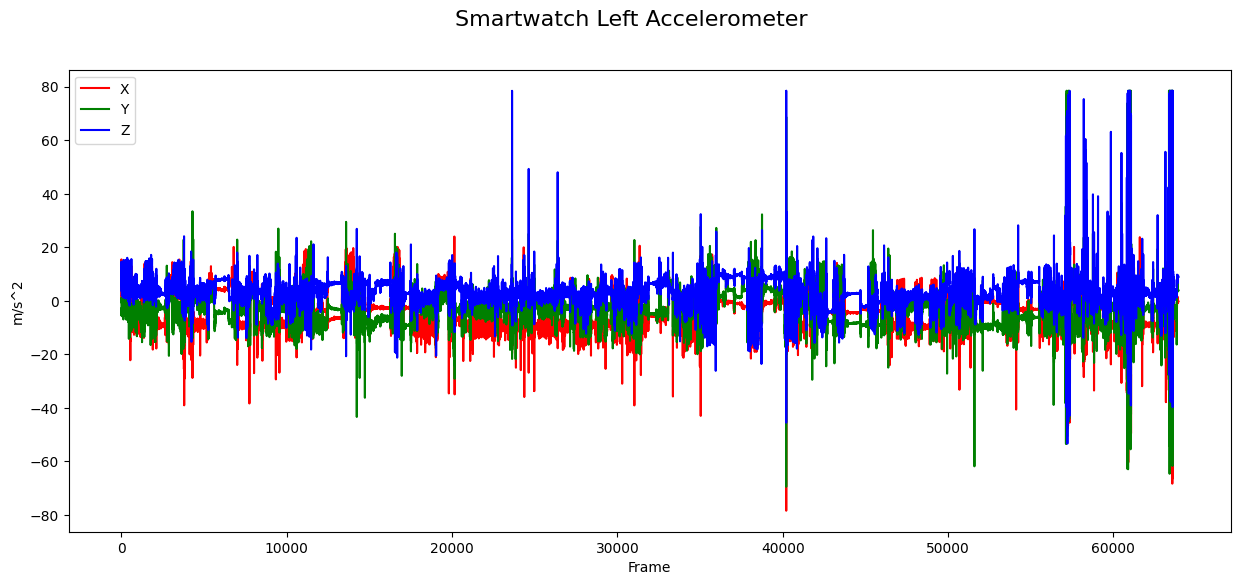

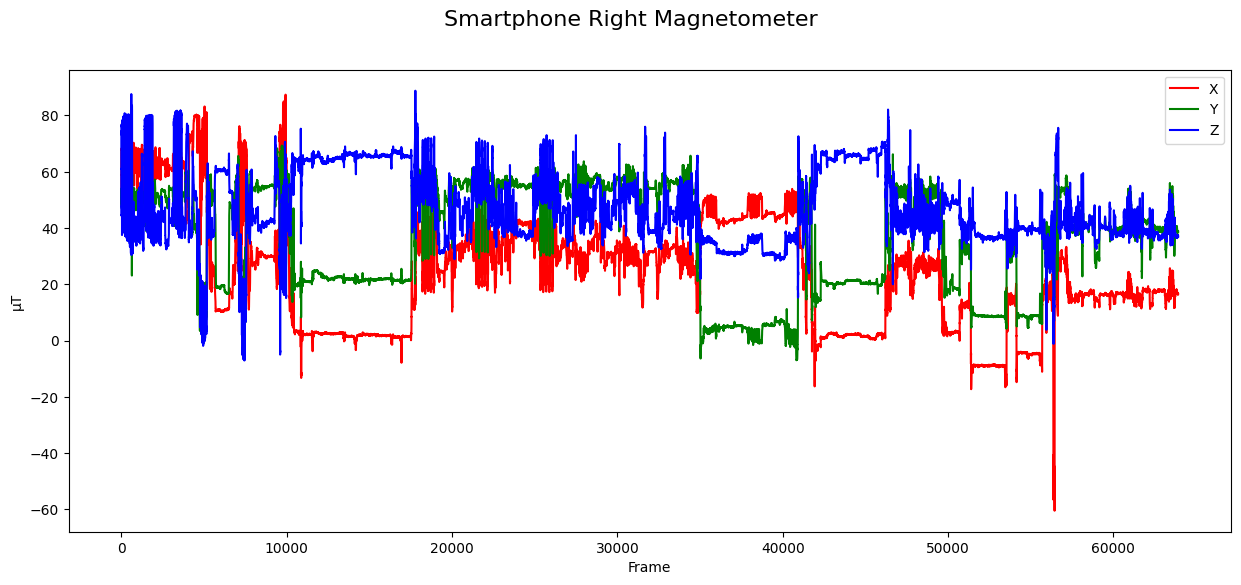

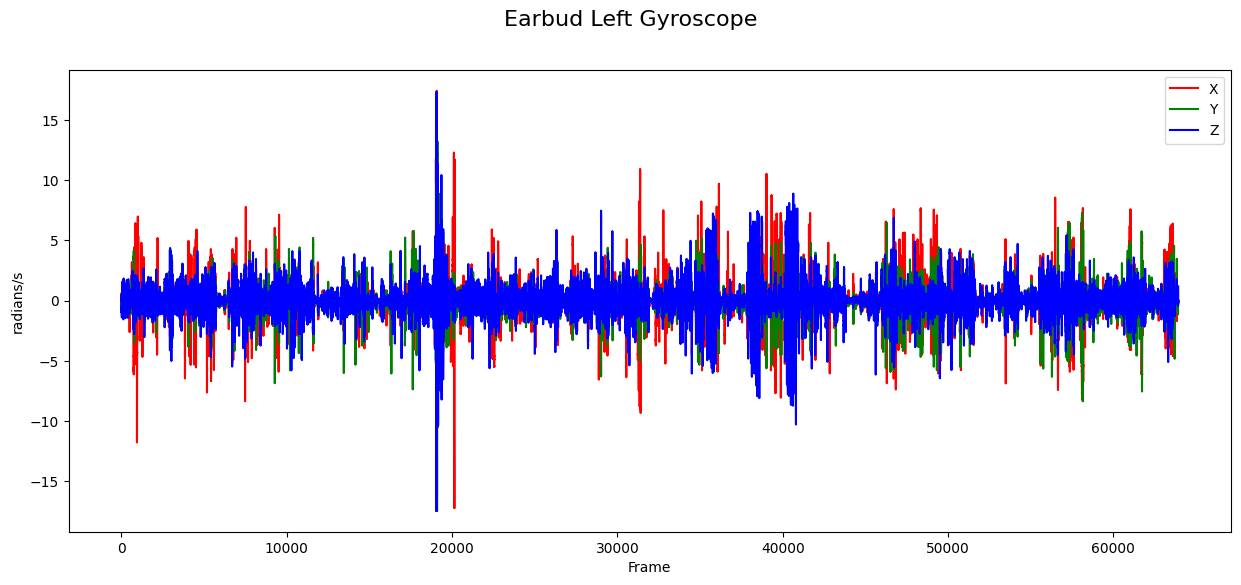

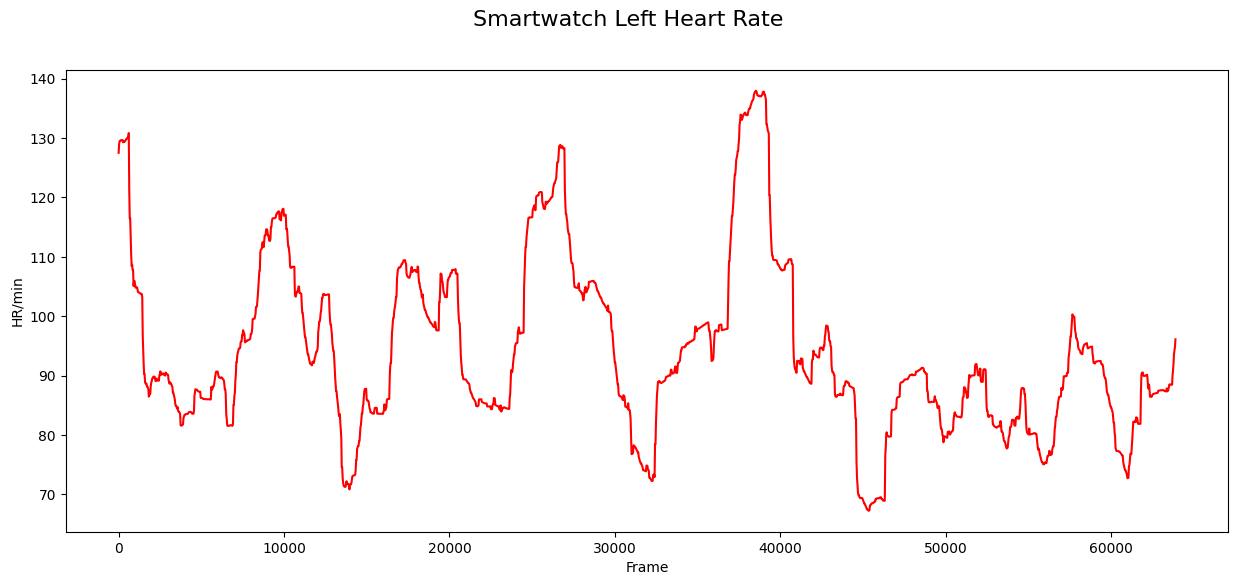

In [7]:
# Plot a few sensor modalities from a smartwatch, smartphone and earbud
plotting.plot_sensor(modalities['sw_l_acc'], data_type='acc', title='Smartwatch Left Accelerometer', overlay=True)
plotting.plot_sensor(modalities['sp_r_mag'], data_type='mag', title='Smartphone Right Magnetometer', overlay=True)
plotting.plot_sensor(modalities['eb_l_gyr'], data_type='gyr', title='Earbud Left Gyroscope', overlay=True)
plotting.plot_sensor(modalities['sw_l_hr'], data_type='hr', title='Smartwatch Left Heart Rate', overlay=True)        

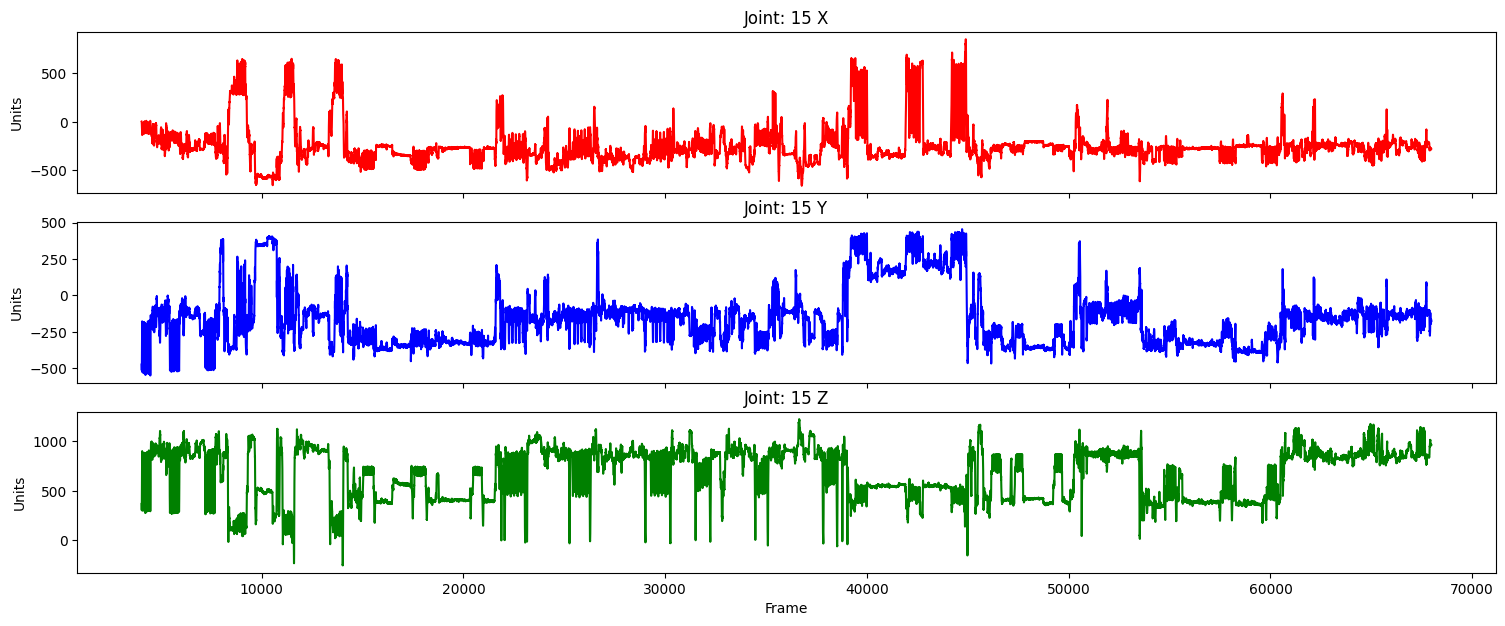

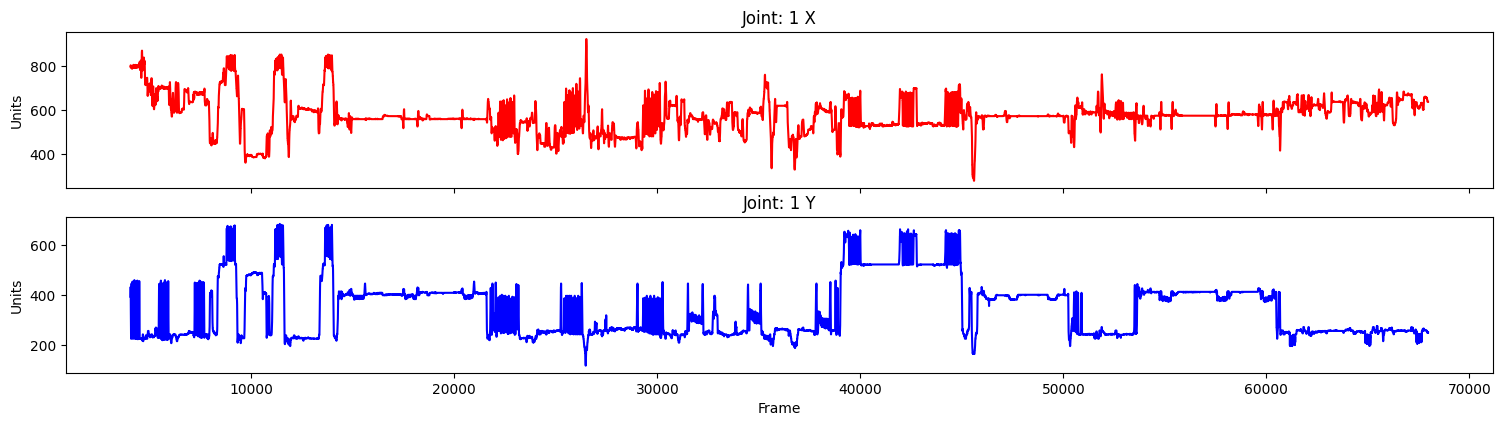

In [8]:
# Plot a selection of joints from the 2D and 3D pose estimates
plotting.plot_joints(modalities['pose_3d'], dim=3, joints=[15])
plotting.plot_joints(modalities['pose_2d'], dim=2, joints=[1])

In [12]:
modalities['pose_2d'][:, frame]

array([[57050.   ,   572.546,   572.547,   525.598,   517.699,   541.275,
          619.531,   623.521,   603.904,   541.305,   496.122,   505.924,
          599.987,   654.831,   629.375,   564.753,   584.289,   554.85 ,
          597.985],
       [57050.   ,   357.084,   413.899,   413.893,   484.418,   505.914,
          415.758,   482.489,   500.108,   517.721,   527.504,   676.361,
          521.598,   525.568,   664.681,   351.18 ,   351.208,   359.011,
          358.999]])

In [16]:
import pandas as pd
path = os.path.normpath(os.path.join(data_dir, w_id + '_pose_2d.npy'))
path

'..\\mm-fit-data\\w00\\w00_pose_2d.npy'

In [21]:
data = np.load(path)
data = data.reshape(-1, data.shape[-1])
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,4050.0,817.413,795.951,741.045,725.332,790.002,854.694,905.597,854.602,742.945,682.289,682.189,821.296,911.485,870.326,803.706,825.284,776.276,837.118
1,4051.0,817.449,797.849,741.076,723.419,789.943,854.774,907.542,852.803,744.947,682.216,682.217,823.274,915.345,868.480,803.720,825.316,776.287,838.924
2,4052.0,817.449,797.897,741.083,717.569,788.034,856.611,907.562,852.783,746.930,680.313,682.217,823.344,917.310,868.480,803.720,825.319,776.335,838.955
3,4053.0,817.449,799.797,742.924,717.558,788.013,856.659,907.562,852.738,748.902,680.214,682.224,823.349,917.479,868.476,803.720,825.323,776.335,839.007
4,4054.0,817.449,801.764,742.938,717.536,788.013,856.659,907.602,852.738,750.873,676.412,682.226,823.397,919.355,868.475,803.720,825.358,776.335,839.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127831,67963.0,210.183,251.226,247.401,284.562,278.674,249.299,323.732,294.394,411.882,527.551,650.906,413.888,529.501,649.036,200.388,196.448,196.469,194.479
127832,67964.0,210.167,251.226,249.291,284.576,278.689,249.299,323.719,294.395,411.882,527.551,650.906,413.888,529.479,649.038,200.355,196.422,196.469,194.457
127833,67965.0,210.128,251.235,249.291,284.579,278.733,249.299,323.719,294.411,411.865,527.527,650.911,413.887,529.501,650.874,200.325,196.390,196.469,194.437
127834,67966.0,210.103,251.237,249.296,284.600,278.733,249.299,323.732,294.411,411.882,527.527,650.909,413.888,531.398,650.872,198.441,196.367,196.469,194.437


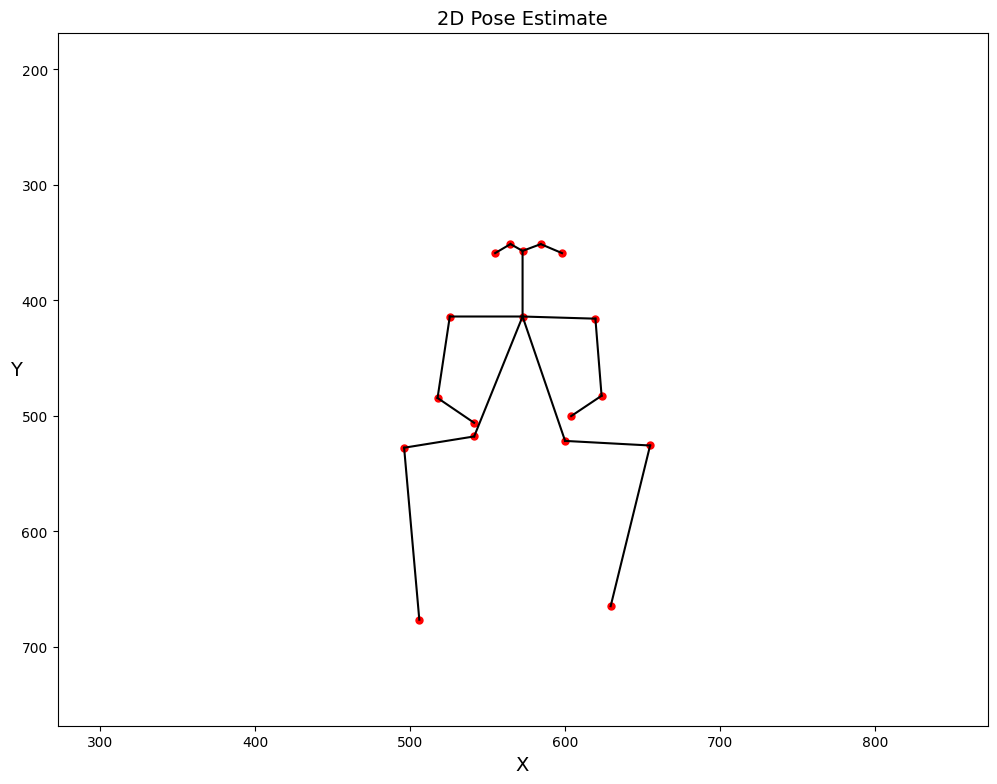

In [9]:
# Plot 2D and 3D skeleton
frame = 53000
skel_2d = modalities['pose_2d'][:, frame, 1:]
skel_3d = modalities['pose_3d'][:, frame, 1:]
plotting.plot_2d_pose(skel_2d, figsize=(12, 9));

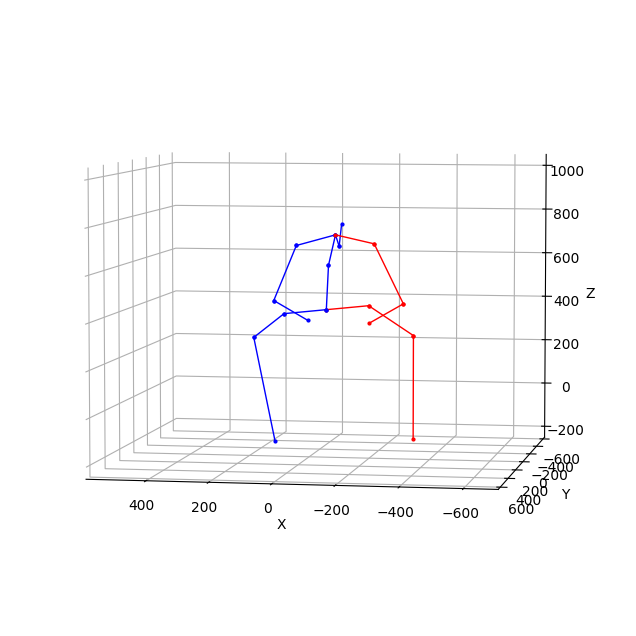

In [10]:
plotting.plot_3d_pose(skel_3d, elev=5, azim=100, figsize=(8,8));

Label: pushups
Repetitions: 10
sw_l_acc (220297, 5)


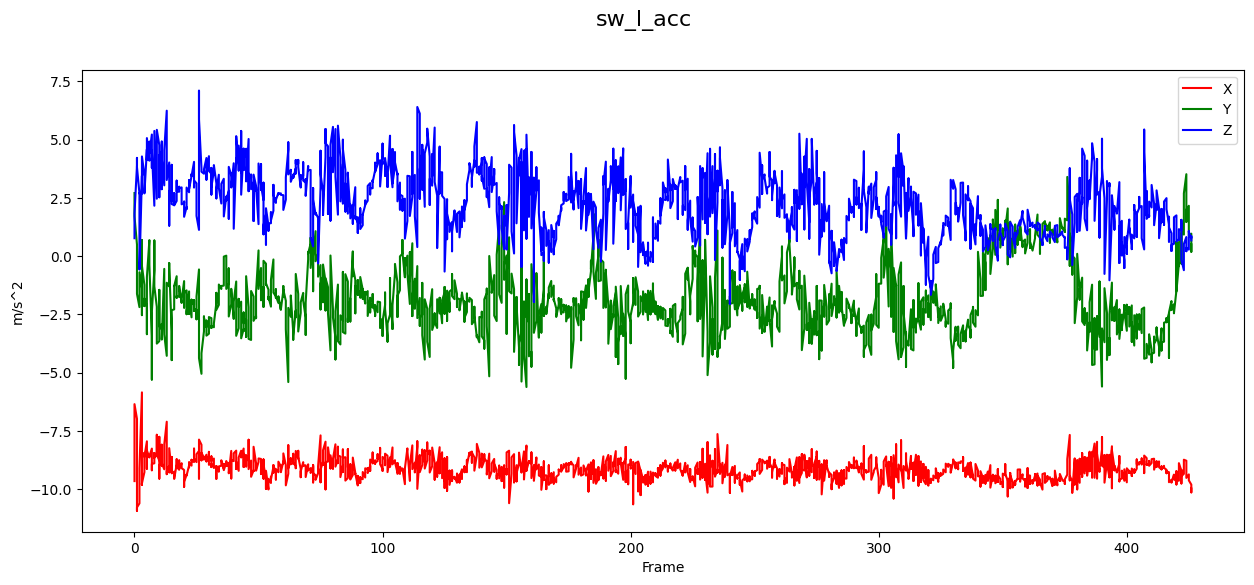

sw_l_gyr (220297, 5)


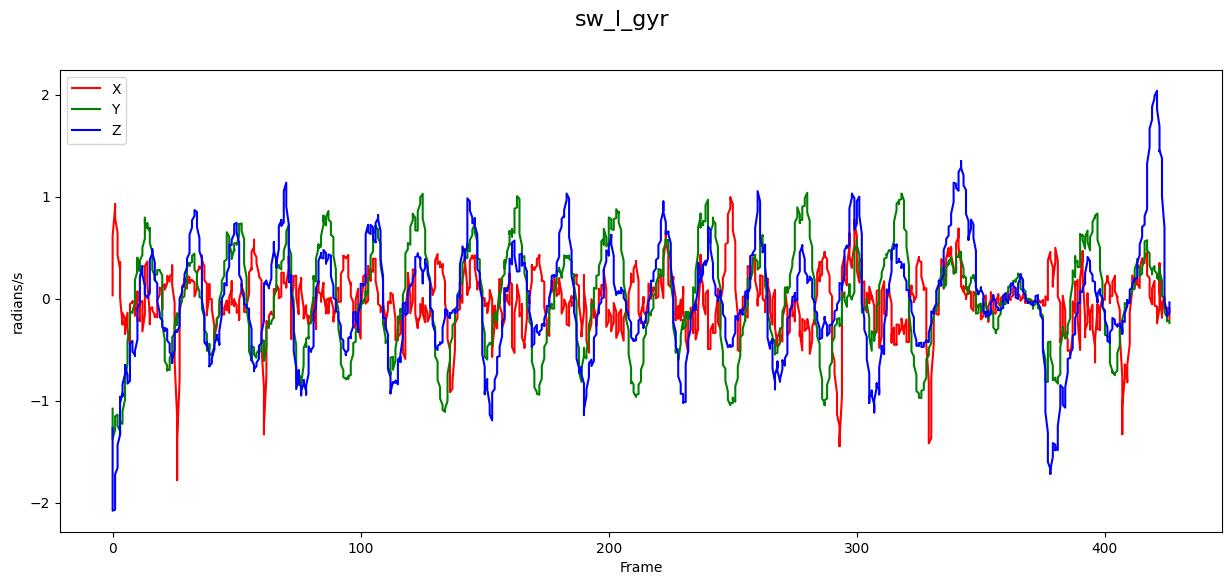

sw_l_hr (2050, 3)


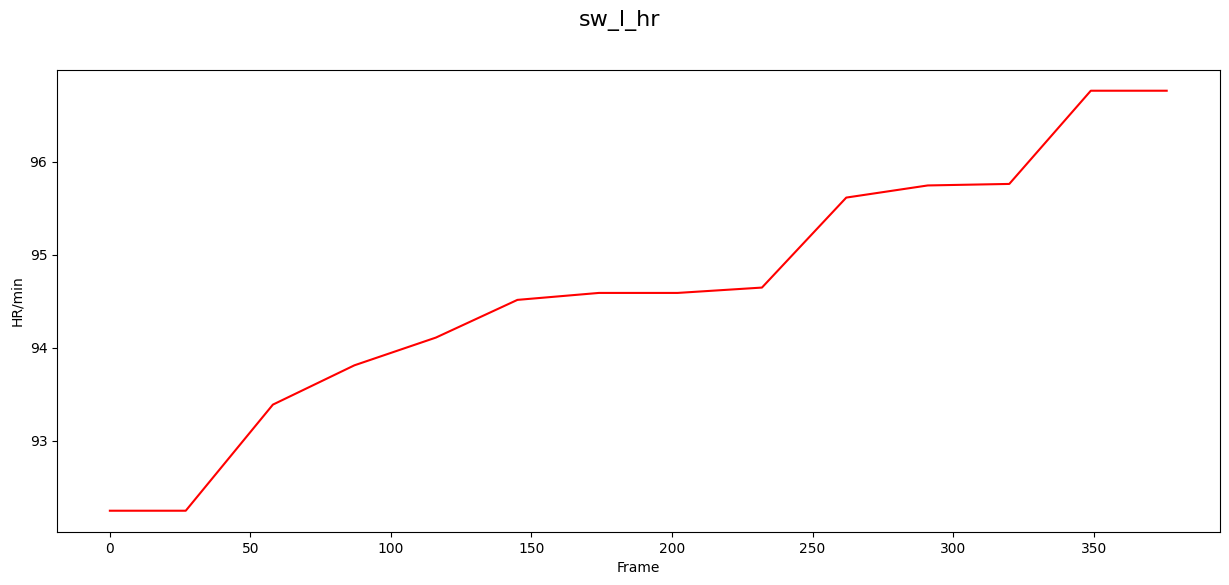

sw_r_acc (222395, 5)


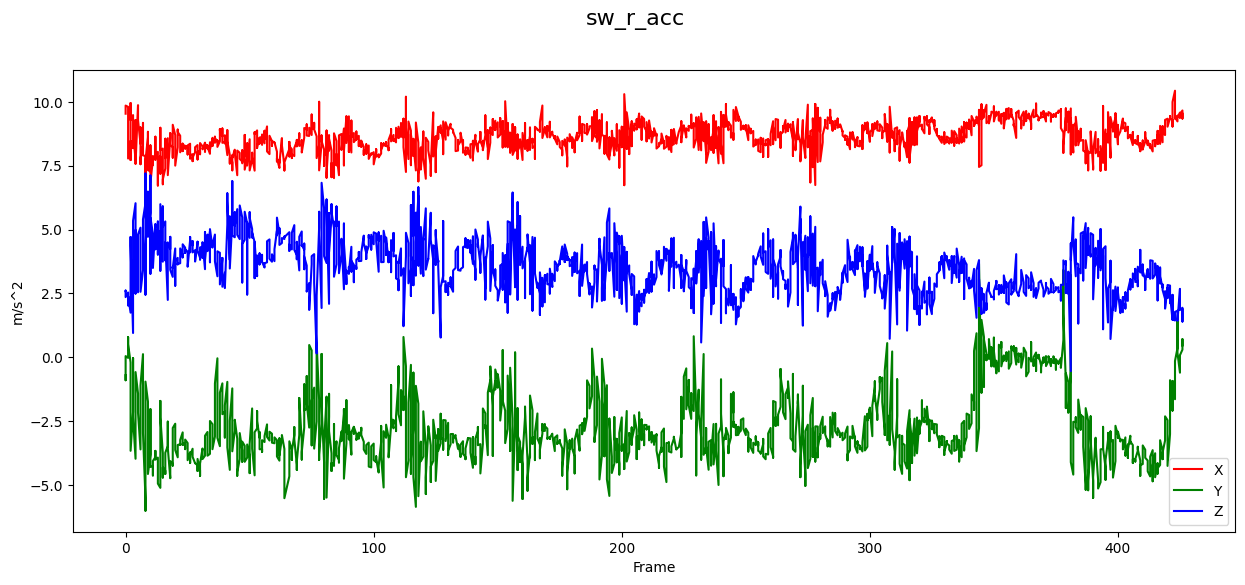

sw_r_gyr (222395, 5)


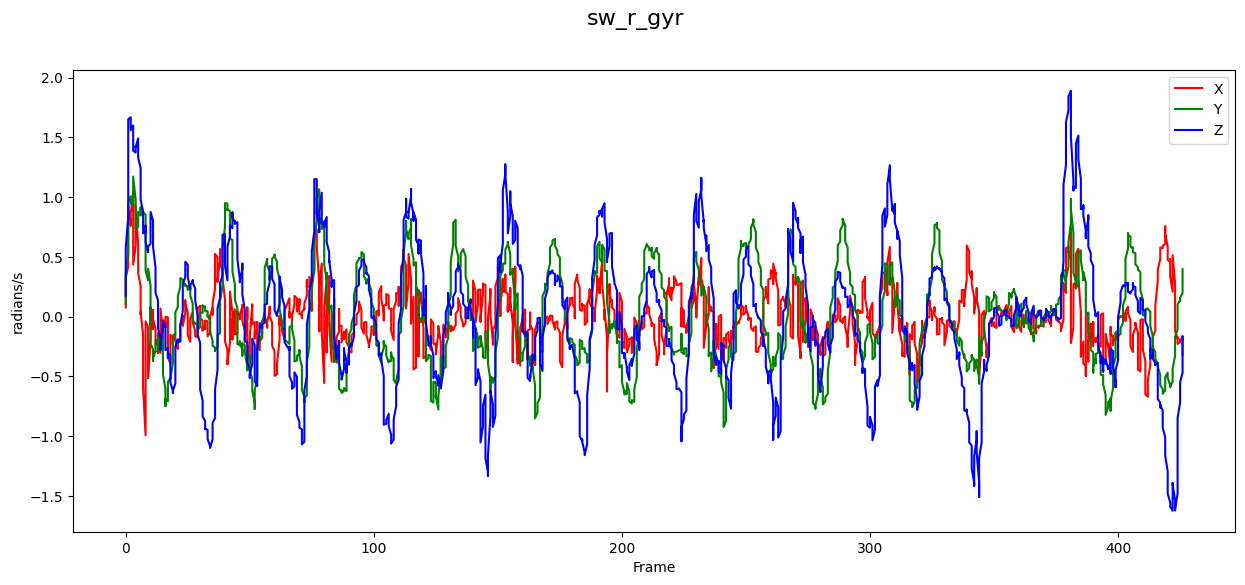

sw_r_hr (1999, 3)


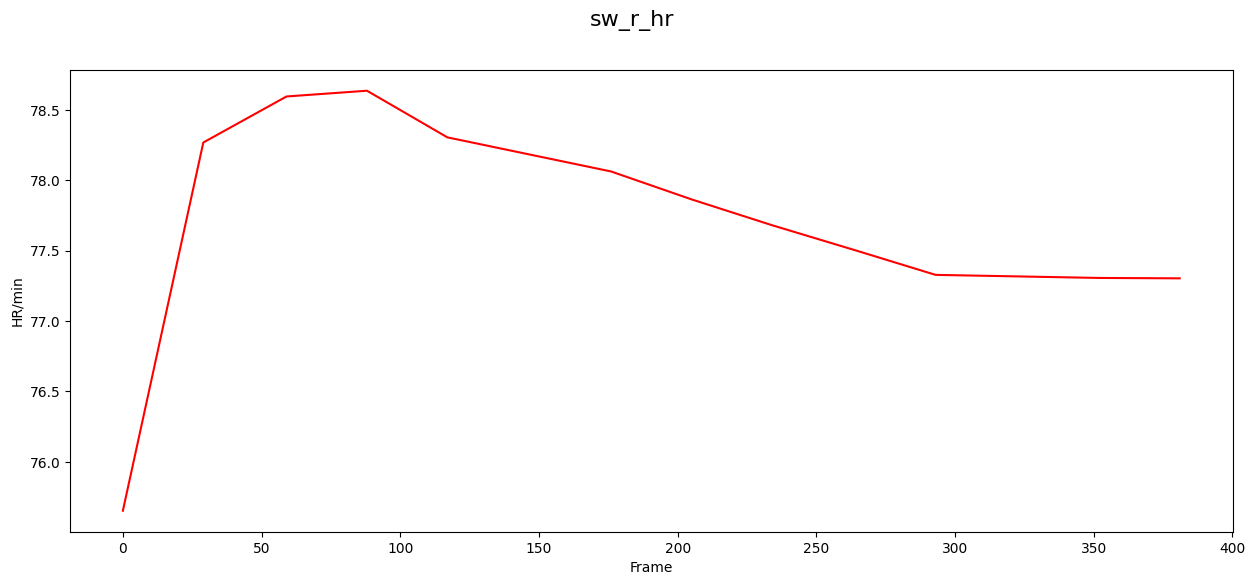

sp_r_acc (462867, 5)


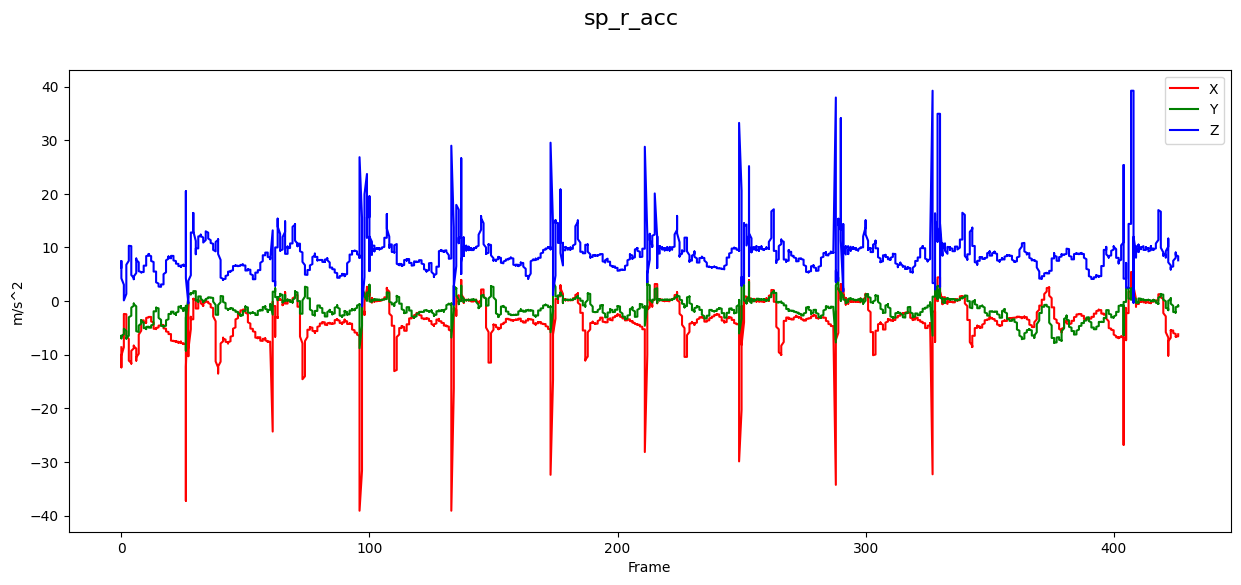

sp_r_gyr (462866, 5)


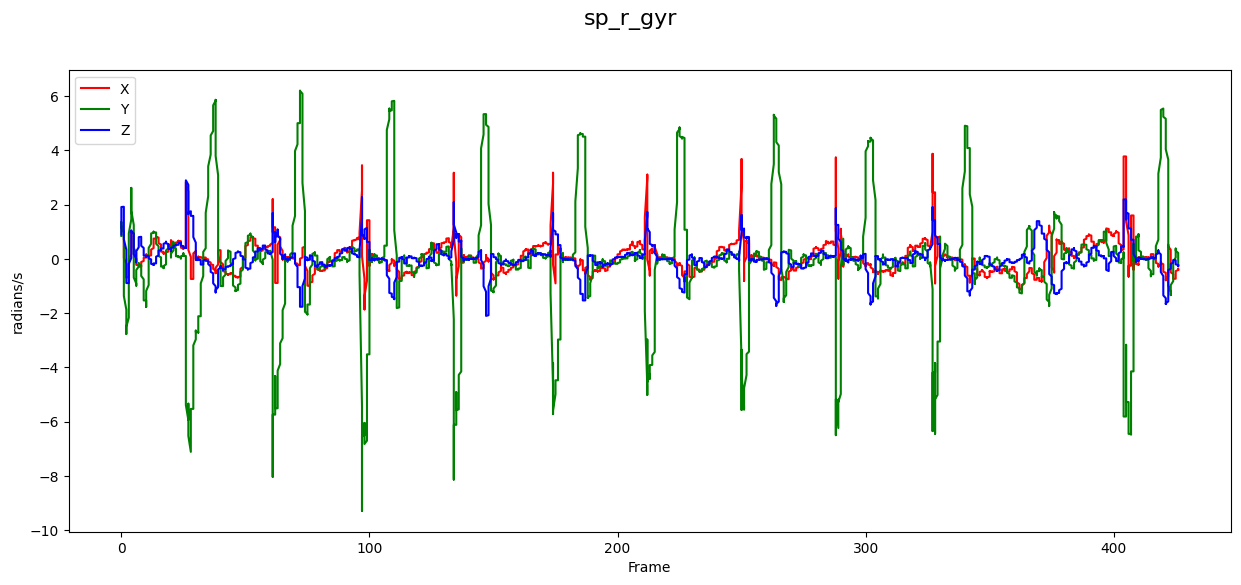

sp_r_mag (215166, 5)


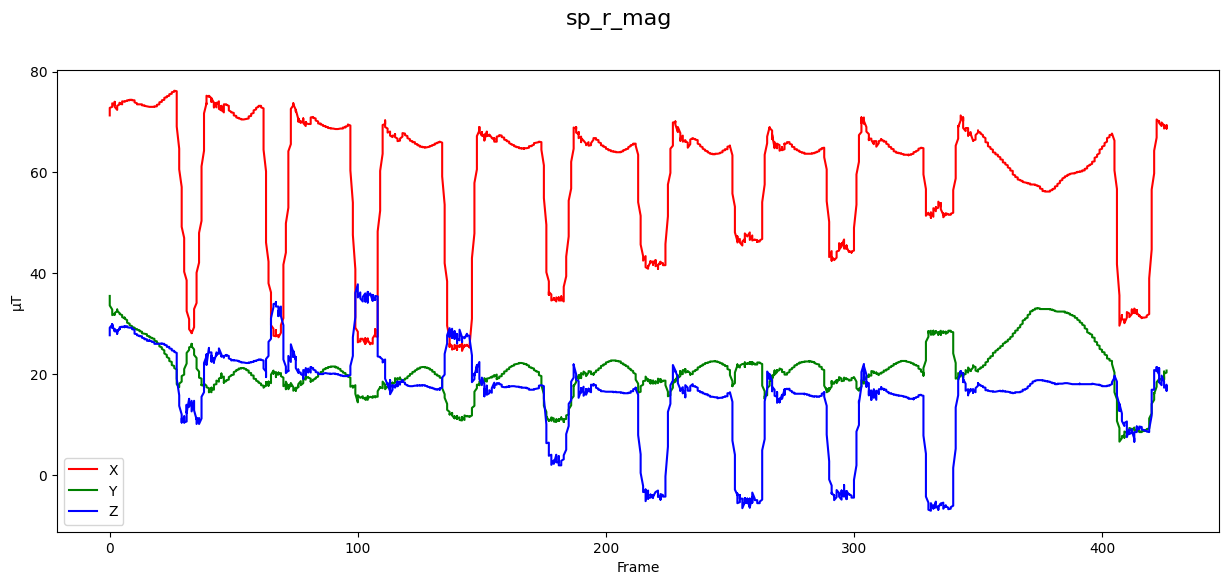

eb_l_acc (195502, 5)


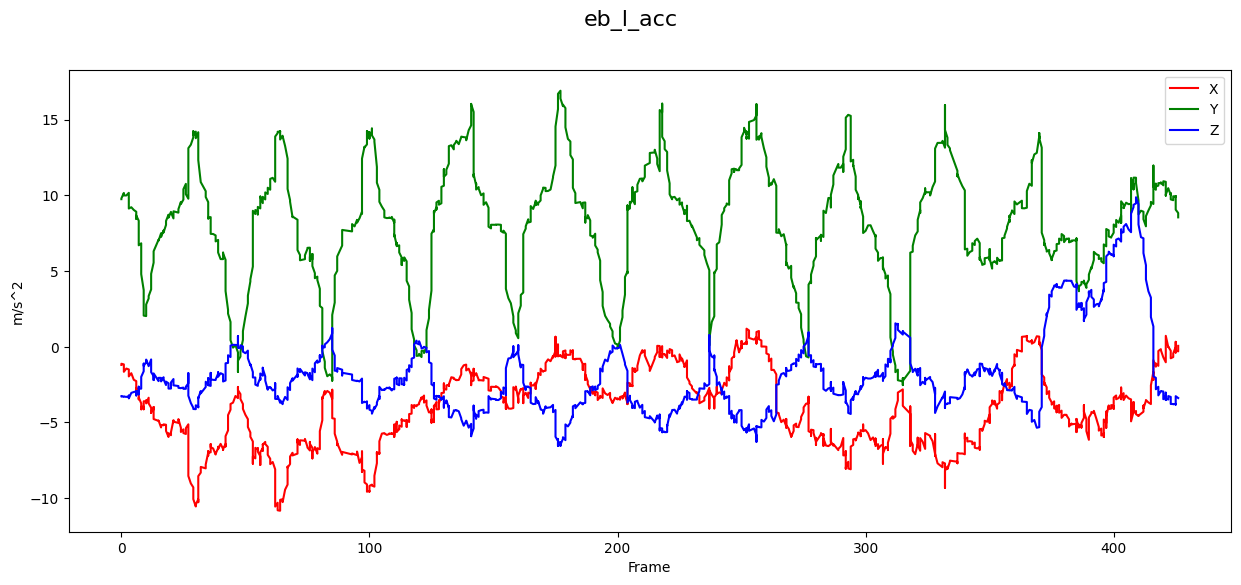

eb_l_gyr (195502, 5)


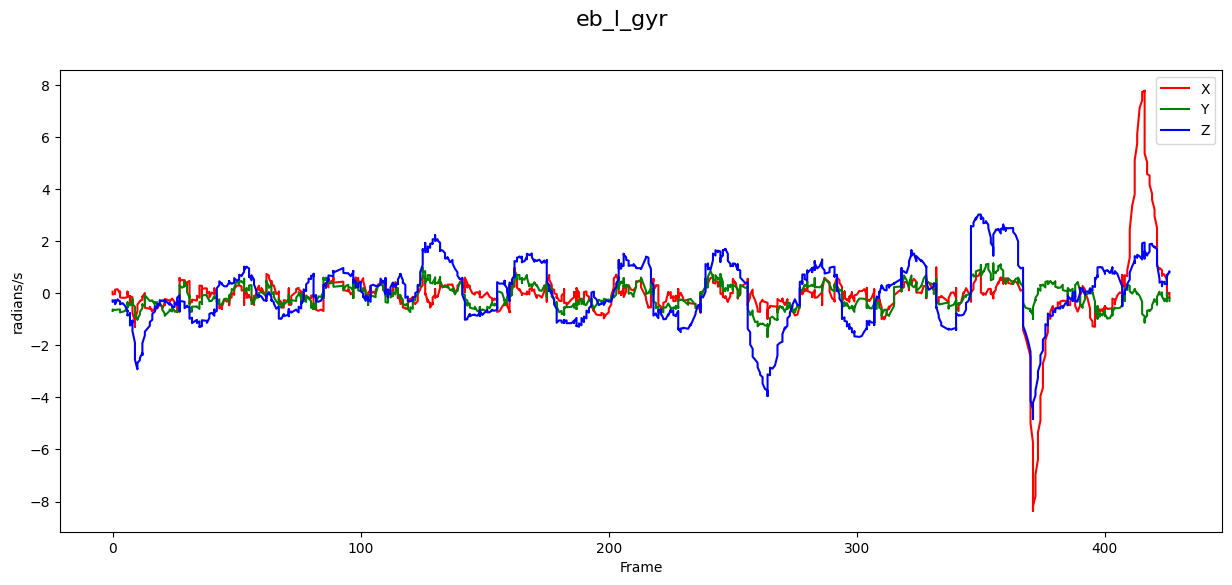

pose_2d (2, 63918, 19)


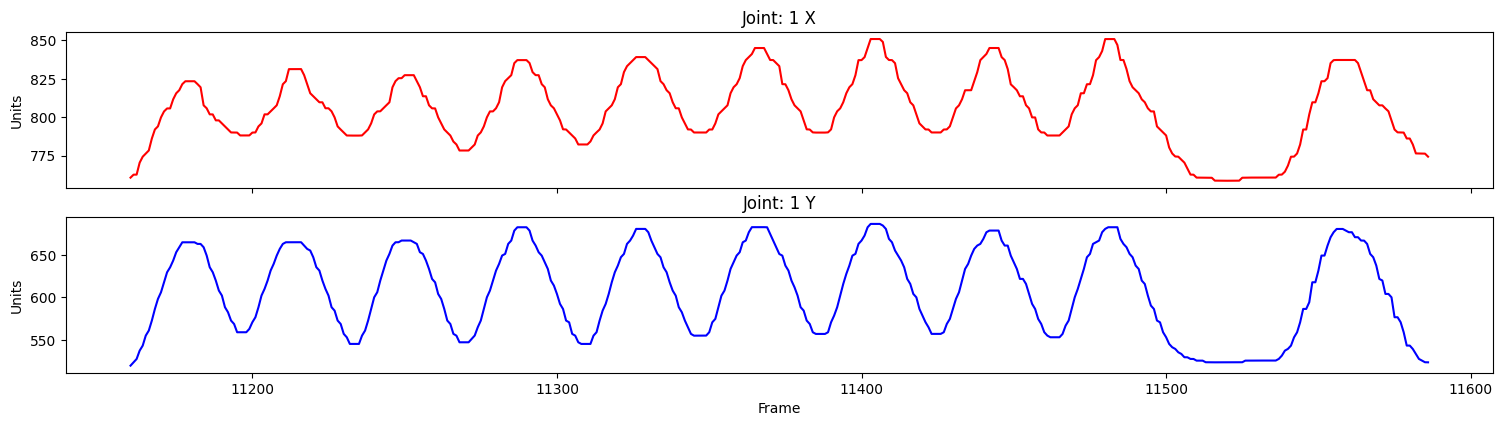

pose_3d (3, 63918, 18)


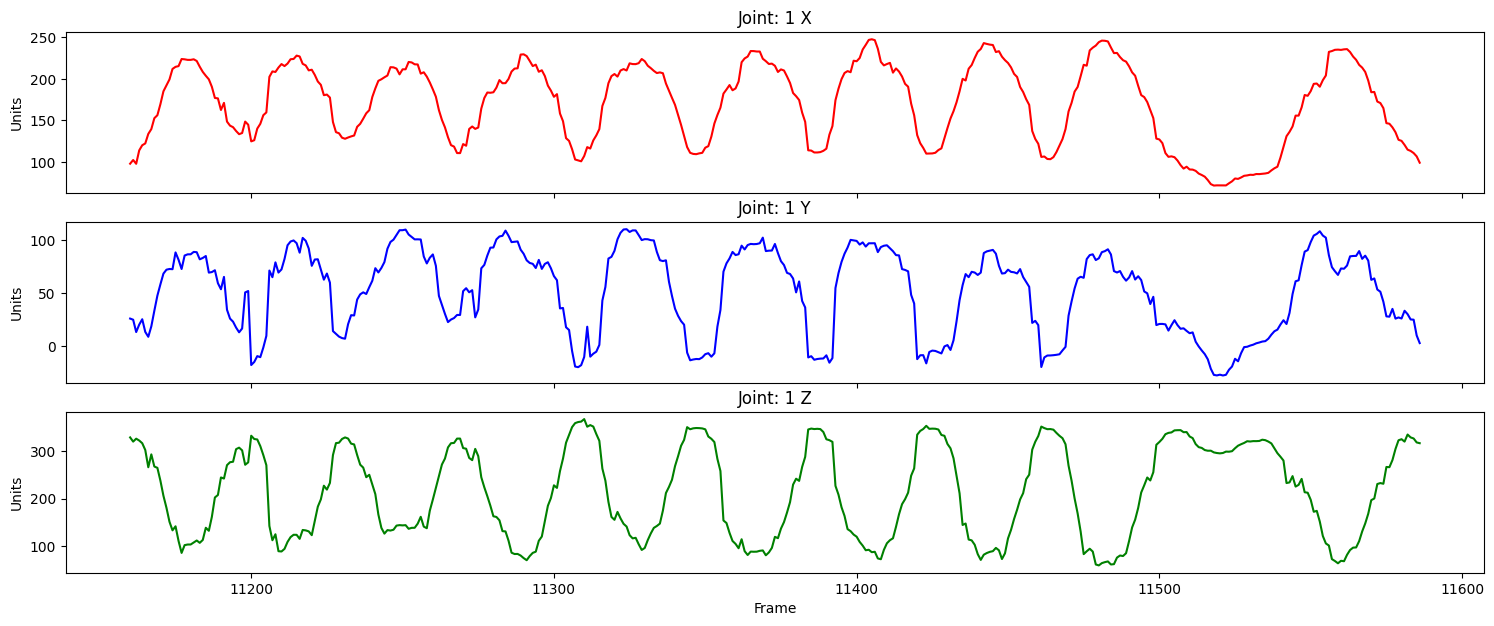

In [11]:
# Plot all modalities for a set of squats
for label in labels[4:5]:
    print('Label: {}'.format(label[3]))
    print('Repetitions: {}'.format(label[2]))
    for mod_type, mod_data in modalities.items():
        mod_subset = utils.get_subset(mod_data, start=label[0], end=label[1])
        print(mod_type, mod_data.shape)
        if mod_type == 'pose_2d':
            plotting.plot_joints(mod_subset, dim=2, joints=[1])
        elif mod_type == 'pose_3d':
            plotting.plot_joints(mod_subset, dim=3, joints=[1])
        else:
            if 'acc' in mod_type:
                data_type = 'acc'
            elif 'gyr' in mod_type:
                data_type = 'gyr'
            elif 'mag' in mod_type:
                data_type = 'mag'
            else:
                data_type = 'hr'
            plotting.plot_sensor(mod_subset, data_type=data_type, title=mod_type, overlay=True)   